In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
stocks = ['IBM']
start_date = '2010-01-01'
end_date = '2020-01-01'

In [3]:
# define a method/function to download data from yahoo finance
def download_data():
    data = {}
    ticker = yf.download(stocks, start_date, end_date)['Adj Close']
    return ticker

In [4]:
stock_data = download_data()

[*********************100%***********************]  1 of 1 completed


In [5]:
log_returns = np.log(stock_data/stock_data.shift(1))
log_returns = log_returns[1:]

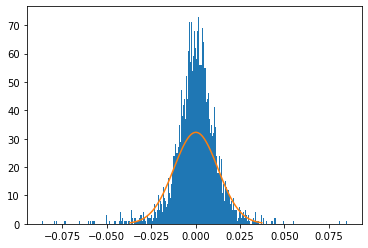

In [7]:
plt.hist(log_returns, bins=300)
stock_variance = log_returns.var()
stock_mean = log_returns.mean()
sigma = np.sqrt(stock_variance)
x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
plt.plot(x, norm.pdf(x, stock_mean, sigma))
plt.show()